In [1]:

import os
import cv2
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import layers
from sklearn.metrics import f1_score
import tensorflow as tf   
tf.get_logger().setLevel('ERROR')

mpl.rcParams['figure.figsize'] = (16, 14)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(tf.__version__)

2024-12-05 01:54:29.820956: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 01:54:29.846674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [2]:
pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 7.0 MB/s eta 0:00:006.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
## Iterate over data folders for classes name and train-test split !!

BASE_DATA_FOLD = 'lalit_data'
TESTING_FOLD = 'lalit_data/test'
TRAINING_FOLD = 'lalit_data/train'

# augmented = False

# if augmented:
#     TRAINING_FOLD = 'augmented_training'
    
# validation_img = 'validation_images.npy'
# validation_labl = 'validation_labels.npy'
# if not augmented:
#     training_img = 'training_images.npy'
#     training_labl = 'training_labels.npy'
# else:
#     training_img = 'aug_training_images.npy'
#     training_labl = 'aug_training_labels.npy'

CWD = os.getcwd()
SRC = os.path.join(CWD, BASE_DATA_FOLD)
print(SRC)
TRAINING_DIR_PATH = os.path.join(CWD, TRAINING_FOLD)
TESTING_DIR_PATH = os.path.join(CWD, TESTING_FOLD)

CLASSES = sorted(os.listdir(SRC))
print(CLASSES)

SRC_DIR_PATHS = [os.path.join(SRC, Class) for Class in CLASSES]
TRAINING_CLASS_DIR_PATHS = [os.path.join(TRAINING_DIR_PATH, Class) for Class in CLASSES]

TESTING_CLASS_DIR_PATHS = [os.path.join(TESTING_DIR_PATH, Class) for Class in CLASSES]

/home/shamsher/aditya/code/lalit_data
['auto-rickshaw', 'bicycle', 'bus', 'car', 'e-rickshaw', 'mini-bus', 'mini-truck', 'motorcycle', 'rickshaw', 'test', 'tractor', 'train', 'truck', 'van']


In [3]:
print(TRAINING_DIR_PATH)
print(TRAINING_CLASS_DIR_PATHS)
print(TESTING_DIR_PATH)
print(TESTING_CLASS_DIR_PATHS)

/home/shamsher/aditya/code/lalit_data/train
['/home/shamsher/aditya/code/lalit_data/train/auto-rickshaw', '/home/shamsher/aditya/code/lalit_data/train/bicycle', '/home/shamsher/aditya/code/lalit_data/train/bus', '/home/shamsher/aditya/code/lalit_data/train/car', '/home/shamsher/aditya/code/lalit_data/train/e-rickshaw', '/home/shamsher/aditya/code/lalit_data/train/mini-bus', '/home/shamsher/aditya/code/lalit_data/train/mini-truck', '/home/shamsher/aditya/code/lalit_data/train/motorcycle', '/home/shamsher/aditya/code/lalit_data/train/rickshaw', '/home/shamsher/aditya/code/lalit_data/train/test', '/home/shamsher/aditya/code/lalit_data/train/tractor', '/home/shamsher/aditya/code/lalit_data/train/train', '/home/shamsher/aditya/code/lalit_data/train/truck', '/home/shamsher/aditya/code/lalit_data/train/van']
/home/shamsher/aditya/code/lalit_data/test
['/home/shamsher/aditya/code/lalit_data/test/auto-rickshaw', '/home/shamsher/aditya/code/lalit_data/test/bicycle', '/home/shamsher/aditya/code/l

In [4]:
# CLASSES2=['00-Human Intervention','01-Bike','03-Car Hatchback','04-Car Sedan','05-Car SUV','06-Tractor','07-Jeep Scorpio Bolero','08-PickUp','09-Car Omni','11-Tata Ace','13-LCV 2 Axle Truck','14-LCV 2 Axle Bus','17-Truck 2 Axle  Big','22-Truck 2 Axle loading','23-Bus 2 Axle Big','26-MAV 3 Axle Truck','30-MAV 4 Axle','31-MAV 4 lifted axle','32-MAV 4 Axle trailer','33-MAV 5 Axle','34-MAV 5 lifted axle','35-MAV 5 Axle Trailer','36-MAV 5 AXLE trailer Lifted','37-MAV 6 Axle','38-MAV 6 Axle Lifted']
# CLASSES2.sort()
# print(CLASSES2)
# len(CLASSES2)


In [5]:
# len(CLASSES2)

In [6]:
import random
import shutil
from shutil import copyfile
## Create Training and Testing folders !!
for path in TRAINING_CLASS_DIR_PATHS:
    os.makedirs(path, exist_ok=True)
for path in TESTING_CLASS_DIR_PATHS:
    os.makedirs(path, exist_ok=True)

# Split data in train & test !!
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE=0.8):
    for fname in random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE))):
        if (fname.endswith('jpg') or fname.endswith('bmp') or fname.endswith('png') or fname.endswith('jpeg')):
            source = os.path.join(SOURCE, fname)
            if(os.path.getsize(source) != 0):
                if(len(os.listdir(TRAINING)) < len(os.listdir(SOURCE))*SPLIT_SIZE):
                    destination = os.path.join(TRAINING, fname)
                else:
                    destination = os.path.join(TESTING, fname)
                copyfile(source, destination)


for path in zip(SRC_DIR_PATHS, TRAINING_CLASS_DIR_PATHS, TESTING_CLASS_DIR_PATHS):
    print('Splitting Data from...', path[0])
    split_data(path[0], path[1], path[2])

Splitting Data from... /home/shamsher/aditya/code/lalit_data/auto-rickshaw
Splitting Data from... /home/shamsher/aditya/code/lalit_data/bicycle
Splitting Data from... /home/shamsher/aditya/code/lalit_data/bus
Splitting Data from... /home/shamsher/aditya/code/lalit_data/car
Splitting Data from... /home/shamsher/aditya/code/lalit_data/e-rickshaw
Splitting Data from... /home/shamsher/aditya/code/lalit_data/mini-bus
Splitting Data from... /home/shamsher/aditya/code/lalit_data/mini-truck
Splitting Data from... /home/shamsher/aditya/code/lalit_data/motorcycle
Splitting Data from... /home/shamsher/aditya/code/lalit_data/rickshaw
Splitting Data from... /home/shamsher/aditya/code/lalit_data/test
Splitting Data from... /home/shamsher/aditya/code/lalit_data/tractor
Splitting Data from... /home/shamsher/aditya/code/lalit_data/train
Splitting Data from... /home/shamsher/aditya/code/lalit_data/truck
Splitting Data from... /home/shamsher/aditya/code/lalit_data/van


In [7]:
print('Training Data Img Count per Class:')
img_count = list()
for i, path in enumerate(TRAINING_CLASS_DIR_PATHS):
    count = len(os.listdir(path))
    img_count.append(count)
    print(i,':', path.split('/')[-1], ':', count)
    
print(f'Max:{max(img_count)} , Min:{min(img_count)}')
print('\nTotal Training images:', sum(img_count))
#
img_count.clear()
print('\nTesting Data Img Count per Class:')
for i, path in enumerate(TESTING_CLASS_DIR_PATHS):
    count = len(os.listdir(path))
    img_count.append(count)
    print(i,':', path.split('/')[-1], ':', count)
print('\nTotal Testing images:', sum(img_count))

Training Data Img Count per Class:
0 : auto-rickshaw : 470
1 : bicycle : 123
2 : bus : 160
3 : car : 156
4 : e-rickshaw : 74
5 : mini-bus : 54
6 : mini-truck : 325
7 : motorcycle : 207
8 : rickshaw : 29
9 : test : 0
10 : tractor : 87
11 : train : 0
12 : truck : 182
13 : van : 392
Max:470 , Min:0

Total Training images: 2259

Testing Data Img Count per Class:
0 : auto-rickshaw : 587
1 : bicycle : 153
2 : bus : 199
3 : car : 194
4 : e-rickshaw : 92
5 : mini-bus : 67
6 : mini-truck : 406
7 : motorcycle : 258
8 : rickshaw : 36
9 : test : 0
10 : tractor : 108
11 : train : 0
12 : truck : 227
13 : van : 489

Total Testing images: 2816


In [8]:
validation_img = 'validation_images.npy'
validation_labl = 'validation_labels.npy'
training_img = 'training_images.npy'
training_labl = 'training_labels.npy'

# if not augmented:
#     training_img = 'training_images.npy'
#     training_labl = 'training_labels.npy'
# else:
#     training_img = 'aug_training_images.npy'
#     training_labl = 'aug_training_labels.npy'

if not (os.path.exists(training_img) and os.path.exists(training_labl)
    and os.path.exists(validation_img) and os.path.exists(validation_labl)):
    
    training_images= list()
    training_labels= list()
    validation_images= list()
    validation_labels= list()

    if not(os.path.exists(training_img) and os.path.exists(training_labl)): 
        IMAGES = [os.path.join(fold, image) for fold in TRAINING_CLASS_DIR_PATHS for image in os.listdir(fold)]
        print('Loading Training Data ....')
        print(len(IMAGES))
        for img in IMAGES:
            im = plt.imread(img)
            training_images.append(cv2.resize(im, (224, 224)))
            training_labels.append(CLASSES.index(img.split('/')[-2]))
        print('Training_images_size:', len(training_images))
        print('Training_labels_size:', len(training_labels))
        print('\nSaving Training Data and Labels in np format...')
        training_images = np.array(training_images)
        np.save(training_img, training_images)
        training_labels = np.array(training_labels)
        np.save(training_labl, training_labels)
        IMAGES.clear()
        print('Saving Done !!')
    else:
        print('\nLoading Training data from numpy files...')
        training_images = np.load(training_img)
        training_labels = np.load(training_labl)
        print('Loading Done !!')

    
    if not(os.path.exists(validation_img) and os.path.exists(validation_labl)):
        IMAGES = [os.path.join(fold, image) for fold in TESTING_CLASS_DIR_PATHS for image in os.listdir(fold)]
        print('\nLoading Validation Data ....')
        print(len(IMAGES))
        for img in IMAGES:
            try:
                im = plt.imread(img)
                validation_images.append(cv2.resize(im, (224, 224)))
                validation_labels.append(CLASSES.index(img.split('/')[-2]))
            except OSError as e:
                print(f"Skipping corrupted image: {img}, error: {e}")
                continue

        print('Validation_images_size:', len(validation_images))
        print('Validation_labels_size:', len(validation_labels))

        print('Saving Validation Data and Labels in np format...')
        validation_images = np.array(validation_images)
        np.save(validation_img, validation_images)
        validation_labels = np.array(validation_labels)
        np.save(validation_labl, validation_labels)
        IMAGES.clear()
        print('Saving Done !!')
    else:
        print('\nLoading Validation data from numpy files...')
        validation_images = np.load(validation_img)
        validation_labels = np.load(validation_labl)
        print('Loading Done !!')        

else:
    print('Loading data from numpy files...')
    training_images = np.load(training_img)
    training_labels = np.load(training_labl)
    validation_images = np.load(validation_img)
    validation_labels = np.load(validation_labl)
    print('Loading Done !!')

Loading data from numpy files...
Loading Done !!


In [9]:
CLASSES2=[item.split('/')[-1] for item in TESTING_CLASS_DIR_PATHS if len(os.listdir(item)) > 0]
CLASSES2.sort()
print(CLASSES2)
len(CLASSES2)

['auto-rickshaw', 'bicycle', 'bus', 'car', 'e-rickshaw', 'mini-bus', 'mini-truck', 'motorcycle', 'rickshaw', 'tractor', 'truck', 'van']


12

In [10]:
training_images = np.load(training_img)
training_labels = np.load(training_labl)
validation_images = np.load(validation_img)
validation_labels = np.load(validation_labl)

In [11]:
METRICS = [
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalsePositives(name='fp'),
        tf.keras.metrics.TrueNegatives(name='tn'),
        tf.keras.metrics.FalseNegatives(name='fn'), 
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Define a Callback class that stops training once accuracy reaches 99.9%
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=7,
    mode='max',
    restore_best_weights=True)

def preprocess(inputs):
    imgs = inputs.astype('float32')
    processed_input = tf.keras.applications.resnet_v2.preprocess_input(imgs)
    return processed_input

2024-12-05 01:54:52.950607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-05 01:54:52.993271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-05 01:54:52.999692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [12]:
def plot_metrics(history):
    metrics = ['accuracy', 'loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(3,3,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0_2out06-00-05326.png0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend();

In [13]:
print(len(set(validation_labels)))

12


In [14]:
print('\nProcessing Images ...')
train_X = training_images
valid_X = validation_images

training_labels = tf.keras.utils.to_categorical(training_labels,12)
print(training_labels)
validation_labels = tf.keras.utils.to_categorical(validation_labels,12)
print('Processing Done !')


Processing Images ...
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Processing Done !


In [15]:
pre_trained_model = tf.keras.applications.resnet_v2.ResNet50V2(include_top = False, weights = 'imagenet')
processed_input = tf.keras.applications.resnet_v2.preprocess_input
for layer in pre_trained_model.layers[:29]:    #Freeze weights of eight five layers 29
    layer.trainable = False

pre_trained_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                      

In [16]:
#pip install h5py==2.10 -i https://pypi.tuna.tsinghua.edu.cn/simple/

In [17]:
inputs = tf.keras.Input(shape=(224,224,3))
x = processed_input(inputs)
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(12, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_model")
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=METRICS)

# Print the model summary
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                          

In [18]:
# # Create ImageDataGenerator objects
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.2, brightness_range=[0.2,0.8], preprocessing_function=preprocess)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [19]:
train_data_generator = train_datagen.flow_from_directory(
    TRAINING_DIR_PATH,
    target_size=(224,224),
    class_mode='categorical'
)

test_data_generator = train_datagen.flow_from_directory(
    TESTING_DIR_PATH,
    target_size=(224,224),
    class_mode='categorical',
    shuffle=False
)

BATCH_SIZE = 16
#tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):
    history = model.fit(train_X, training_labels, epochs=30, validation_data = (valid_X, validation_labels), batch_size=BATCH_SIZE, callbacks=[early_stopping])
    #history = model.fit(train_data_generator, validation_data=test_data_generator, batch_size=BATCH_SIZE, epochs=25, callbacks=[early_stopping],workers=32)

Found 2259 images belonging to 14 classes.
Found 2816 images belonging to 14 classes.
Epoch 1/30


KeyboardInterrupt: 

In [20]:
# # Save the entire modelmodel.save("resnet_50lat.h5")
#model.save('data_save1.h5')
model.save('resner_r1_fake.keras')

In [21]:
plot_metrics(history)

NameError: name 'history' is not defined

In [23]:
# Load the model
model = tf.keras.models.load_model('resner_r1.keras')

TypeError: Could not deserialize class 'Functional' because its parent module keras.src.models.functional cannot be imported. Full object config: {'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {'name': 'my_model', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}, 'registered_name': None, 'name': 'input_layer_1', 'inbound_nodes': []}, {'module': 'keras.src.ops.numpy', 'class_name': 'TrueDivide', 'config': {'name': 'true_divide'}, 'registered_name': 'TrueDivide', 'name': 'true_divide', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 3], 'dtype': 'float32', 'keras_history': ['input_layer_1', 0, 0]}}, 127.5], 'kwargs': {}}]}, {'module': 'keras.src.ops.numpy', 'class_name': 'Subtract', 'config': {'name': 'subtract'}, 'registered_name': 'Subtract', 'name': 'subtract', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 3], 'dtype': 'float32', 'keras_history': ['true_divide', 0, 0]}}, 1.0], 'kwargs': {}}]}, {'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {'name': 'resnet50v2', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, None, None, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None, 'name': 'input_layer', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv1_pad', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'padding': [[3, 3], [3, 3]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 3]}, 'name': 'conv1_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 3], 'dtype': 'float32', 'keras_history': ['input_layer', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv1_conv', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 64, 'kernel_size': [7, 7], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 3]}, 'name': 'conv1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 3], 'dtype': 'float32', 'keras_history': ['conv1_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'pool1_pad', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'pool1_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv1_conv', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'pool1_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'pool_size': [3, 3], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'pool1_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['pool1_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block1_preact_bn', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block1_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['pool1_pool', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block1_preact_relu', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block1_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block1_1_conv', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block1_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block1_1_bn', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block1_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block1_1_relu', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block1_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv2_block1_2_pad', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block1_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block1_2_conv', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block1_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block1_2_bn', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block1_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block1_2_relu', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block1_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block1_0_conv', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block1_0_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block1_3_conv', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block1_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block1_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv2_block1_out', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 256], [None, None, None, 256]]}, 'name': 'conv2_block1_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block1_0_conv', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block1_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block2_preact_bn', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv2_block2_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block1_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block2_preact_relu', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block2_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block2_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block2_1_conv', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv2_block2_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block2_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block2_1_bn', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block2_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block2_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block2_1_relu', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block2_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block2_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv2_block2_2_pad', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block2_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block2_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block2_2_conv', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block2_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block2_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block2_2_bn', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block2_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block2_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block2_2_relu', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block2_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block2_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block2_3_conv', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block2_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block2_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv2_block2_out', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 256], [None, None, None, 256]]}, 'name': 'conv2_block2_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block1_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block2_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block3_preact_bn', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv2_block3_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block2_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block3_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block3_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block3_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block3_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv2_block3_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block3_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block3_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block3_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block3_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block3_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block3_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block3_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv2_block3_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block3_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block3_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block3_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 64, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block3_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block3_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv2_block3_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block3_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block3_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv2_block3_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv2_block3_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block3_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'pool_size': [1, 1], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'max_pooling2d', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block2_out', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2_block3_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 64]}, 'name': 'conv2_block3_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 64], 'dtype': 'float32', 'keras_history': ['conv2_block3_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv2_block3_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 256], [None, None, None, 256]]}, 'name': 'conv2_block3_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['max_pooling2d', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block3_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block1_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv3_block1_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv2_block3_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block1_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block1_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv3_block1_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block1_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv3_block1_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv3_block1_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block1_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block1_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block1_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block1_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block1_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block1_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv3_block1_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block1_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block1_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block1_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block1_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block1_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block1_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block1_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block1_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block1_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block1_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block1_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block1_0_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv3_block1_0_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv3_block1_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block1_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block1_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block1_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv3_block1_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 512], [None, None, None, 512]]}, 'name': 'conv3_block1_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block1_0_conv', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block1_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block2_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv3_block2_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block1_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block2_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block2_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block2_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block2_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv3_block2_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block2_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block2_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block2_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block2_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block2_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block2_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block2_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv3_block2_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block2_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block2_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block2_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block2_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block2_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block2_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block2_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block2_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block2_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block2_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block2_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block2_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block2_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block2_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv3_block2_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 512], [None, None, None, 512]]}, 'name': 'conv3_block2_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block1_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block2_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block3_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv3_block3_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block2_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block3_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block3_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block3_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block3_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv3_block3_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block3_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block3_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block3_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block3_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block3_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block3_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block3_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv3_block3_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block3_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block3_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block3_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block3_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block3_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block3_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block3_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block3_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block3_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block3_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block3_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block3_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block3_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block3_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv3_block3_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 512], [None, None, None, 512]]}, 'name': 'conv3_block3_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block2_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block3_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block4_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv3_block4_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block3_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block4_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block4_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block4_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block4_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv3_block4_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block4_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block4_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block4_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block4_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block4_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block4_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block4_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv3_block4_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block4_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block4_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block4_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block4_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block4_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv3_block4_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block4_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block4_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv3_block4_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv3_block4_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block4_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'pool_size': [1, 1], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'max_pooling2d_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block3_out', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv3_block4_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 128]}, 'name': 'conv3_block4_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 128], 'dtype': 'float32', 'keras_history': ['conv3_block4_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv3_block4_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 512], [None, None, None, 512]]}, 'name': 'conv3_block4_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['max_pooling2d_1', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block4_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block1_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv4_block1_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv3_block4_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block1_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block1_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv4_block1_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block1_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv4_block1_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv4_block1_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block1_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block1_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block1_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block1_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block1_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block1_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv4_block1_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block1_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block1_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block1_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block1_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block1_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block1_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block1_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block1_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block1_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block1_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block1_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block1_0_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 1024, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv4_block1_0_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv4_block1_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block1_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 1024, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block1_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block1_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv4_block1_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 1024], [None, None, None, 1024]]}, 'name': 'conv4_block1_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block1_0_conv', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block1_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block2_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block2_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block1_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block2_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block2_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block2_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block2_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block2_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block2_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block2_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block2_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block2_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block2_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block2_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block2_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv4_block2_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block2_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block2_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block2_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block2_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block2_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block2_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block2_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block2_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block2_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block2_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block2_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block2_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 1024, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block2_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block2_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv4_block2_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 1024], [None, None, None, 1024]]}, 'name': 'conv4_block2_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block1_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block2_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block3_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block3_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block2_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block3_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block3_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block3_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block3_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block3_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block3_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block3_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block3_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block3_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block3_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block3_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block3_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv4_block3_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block3_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block3_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block3_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block3_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block3_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block3_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block3_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block3_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block3_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block3_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block3_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block3_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 1024, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block3_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block3_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv4_block3_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 1024], [None, None, None, 1024]]}, 'name': 'conv4_block3_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block2_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block3_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block4_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block4_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block3_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block4_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block4_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block4_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block4_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block4_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block4_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block4_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block4_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block4_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block4_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block4_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block4_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv4_block4_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block4_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block4_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block4_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block4_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block4_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block4_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block4_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block4_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block4_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block4_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block4_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block4_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 1024, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block4_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block4_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv4_block4_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 1024], [None, None, None, 1024]]}, 'name': 'conv4_block4_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block3_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block4_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block5_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block5_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block4_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block5_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block5_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block5_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block5_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block5_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block5_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block5_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block5_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block5_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block5_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block5_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block5_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv4_block5_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block5_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block5_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block5_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block5_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block5_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block5_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block5_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block5_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block5_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block5_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block5_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block5_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 1024, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block5_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block5_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv4_block5_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 1024], [None, None, None, 1024]]}, 'name': 'conv4_block5_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block4_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block5_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block6_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block6_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block5_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block6_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block6_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block6_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block6_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv4_block6_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block6_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block6_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block6_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block6_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block6_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block6_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block6_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv4_block6_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block6_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block6_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block6_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block6_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block6_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv4_block6_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block6_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block6_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv4_block6_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv4_block6_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block6_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'pool_size': [1, 1], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'max_pooling2d_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block5_out', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv4_block6_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 1024, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 256]}, 'name': 'conv4_block6_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 256], 'dtype': 'float32', 'keras_history': ['conv4_block6_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv4_block6_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 1024], [None, None, None, 1024]]}, 'name': 'conv4_block6_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['max_pooling2d_2', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block6_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block1_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv5_block1_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv4_block6_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block1_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block1_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv5_block1_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block1_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv5_block1_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv5_block1_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block1_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block1_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block1_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block1_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block1_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block1_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv5_block1_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block1_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block1_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block1_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block1_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block1_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block1_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block1_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block1_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block1_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block1_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block1_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block1_0_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 2048, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 1024]}, 'name': 'conv5_block1_0_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 1024], 'dtype': 'float32', 'keras_history': ['conv5_block1_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block1_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 2048, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block1_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block1_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv5_block1_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 2048], [None, None, None, 2048]]}, 'name': 'conv5_block1_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block1_0_conv', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block1_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block2_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 2048]}, 'name': 'conv5_block2_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block1_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block2_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block2_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block2_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block2_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 2048]}, 'name': 'conv5_block2_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block2_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block2_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block2_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block2_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block2_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block2_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block2_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv5_block2_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block2_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block2_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block2_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block2_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block2_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block2_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block2_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block2_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block2_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block2_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block2_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block2_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 2048, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block2_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block2_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv5_block2_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 2048], [None, None, None, 2048]]}, 'name': 'conv5_block2_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block1_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block2_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block3_preact_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 2048]}, 'name': 'conv5_block3_preact_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block2_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block3_preact_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block3_preact_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block3_preact_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block3_1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 2048]}, 'name': 'conv5_block3_1_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block3_preact_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block3_1_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block3_1_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block3_1_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block3_1_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block3_1_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block3_1_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv5_block3_2_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'padding': [[1, 1], [1, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block3_2_pad', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block3_1_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block3_2_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block3_2_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block3_2_pad', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'conv5_block3_2_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block3_2_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block3_2_conv', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'conv5_block3_2_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'conv5_block3_2_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block3_2_bn', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv5_block3_3_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'filters': 2048, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 512]}, 'name': 'conv5_block3_3_conv', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 512], 'dtype': 'float32', 'keras_history': ['conv5_block3_2_relu', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'conv5_block3_out', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}}, 'registered_name': None, 'build_config': {'input_shape': [[None, None, None, 2048], [None, None, None, 2048]]}, 'name': 'conv5_block3_out', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block2_out', 0, 0]}}, {'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block3_3_conv', 0, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'post_bn', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'axis': 3, 'momentum': 0.99, 'epsilon': 1.001e-05, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None, 'synchronized': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None, None, 2048]}, 'name': 'post_bn', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['conv5_block3_out', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'post_relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'activation': 'relu'}, 'registered_name': None, 'name': 'post_relu', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, None, None, 2048], 'dtype': 'float32', 'keras_history': ['post_bn', 0, 0]}}], 'kwargs': {}}]}], 'input_layers': [['input_layer', 0, 0]], 'output_layers': [['post_relu', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'name': 'resnet50v2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 3], 'dtype': 'float32', 'keras_history': ['subtract', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'GlobalAveragePooling2D', 'config': {'name': 'global_average_pooling2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'data_format': 'channels_last', 'keepdims': False}, 'registered_name': None, 'name': 'global_average_pooling2d', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 7, 7, 2048], 'dtype': 'float32', 'keras_history': ['resnet50v2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 2048]}, 'name': 'flatten', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 2048], 'dtype': 'float32', 'keras_history': ['global_average_pooling2d', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'units': 1024, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 2048]}, 'name': 'dense', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 2048], 'dtype': 'float32', 'keras_history': ['flatten', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'rate': 0.5, 'seed': None, 'noise_shape': None}, 'registered_name': None, 'name': 'dropout', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 1024], 'dtype': 'float32', 'keras_history': ['dense', 0, 0]}}], 'kwargs': {'training': False}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 140533091968640}, 'units': 12, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 1024]}, 'name': 'dense_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 1024], 'dtype': 'float32', 'keras_history': ['dropout', 0, 0]}}], 'kwargs': {}}]}], 'input_layers': [['input_layer_1', 0, 0]], 'output_layers': [['dense_1', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': 'categorical_crossentropy', 'loss_weights': None, 'metrics': [{'module': 'keras.metrics', 'class_name': 'TruePositives', 'config': {'name': 'tp', 'dtype': 'float32', 'thresholds': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'FalsePositives', 'config': {'name': 'fp', 'dtype': 'float32', 'thresholds': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'TrueNegatives', 'config': {'name': 'tn', 'dtype': 'float32', 'thresholds': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'FalseNegatives', 'config': {'name': 'fn', 'dtype': 'float32', 'thresholds': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'CategoricalAccuracy', 'config': {'name': 'accuracy', 'dtype': 'float32'}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'Precision', 'config': {'name': 'precision', 'dtype': 'float32', 'thresholds': None, 'top_k': None, 'class_id': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'Recall', 'config': {'name': 'recall', 'dtype': 'float32', 'thresholds': None, 'top_k': None, 'class_id': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'AUC', 'config': {'name': 'auc', 'dtype': 'float32', 'num_thresholds': 200, 'curve': 'ROC', 'summation_method': 'interpolation', 'multi_label': False, 'num_labels': None, 'label_weights': None, 'from_logits': False}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'AUC', 'config': {'name': 'prc', 'dtype': 'float32', 'num_thresholds': 200, 'curve': 'PR', 'summation_method': 'interpolation', 'multi_label': False, 'num_labels': None, 'label_weights': None, 'from_logits': False}, 'registered_name': None}], 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': False}}

In [24]:
# Load and preprocess the image
image = cv2.imread('/home/shamsher/piyush/resnet_cat_dog/lalit_data/test/auto-rickshaw/0_2out13-00-09353.png')
image_resized = cv2.resize(image, (224, 224))  # Resize to expected input size
image_normalized = image_resized.astype('float32') / 255.0  # Normalize if needed
image_input = np.expand_dims(image_normalized, axis=0)  # Add batch dimension
# Run inference
# Load the model
model = tf.keras.models.load_model('resner_r.keras')
predictions = model.predict(image_input)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the confidence score for the predicted class
confidence_score = np.max(predictions)


# Print the predicted class name and the confidence score
print(f"Predicted Class:", {predicted_class_index})
print(f"Confidence Score: {confidence_score:.4f}")


OSError: No file or directory found at resner_r.keras

In [25]:
# validation_images = np.load(validation_img)
# validation_labels = np.load(validation_labl)

# # valid_X = preprocess(validation_images)
# valid_X = validation_images/255.
# validation_labels = tf.keras.utils.to_categorical(validation_labels,50)

In [26]:


# validation_index = validation_labels
# predictions_index = tf.argmax(test_predictions, axis=1)

In [27]:
# test_data_generator.reset()
# results = model.evaluate_generator(generator=test_data_generator, workers = 1)
# predictions = model.predict_generator(generator=test_data_generator, workers = 1)
# predictions_index = np.argmax(predictions, axis=1)
# # test_data_generator.reset()
# validation_index = test_data_generator.classes#[test_data_generator.index_array]

In [28]:
results = model.evaluate(valid_X, validation_labels)
for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)
print()
test_predictions = model.predict(x=valid_X)
validation_index = tf.argmax(validation_labels, axis=1)
predictions_index = tf.argmax(test_predictions, axis=1)

# print('f1_score:',f1_score(validation_labels, test_predictions))

2024-12-05 01:56:09.299635: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-12-05 01:56:09.629793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


18/18 [==============================] - 4s 119ms/step - loss: 2.5086 - tp: 0.0000e+00 - fp: 4.0000 - tn: 6123.0000 - fn: 557.0000 - accuracy: 0.1400 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5985 - prc: 0.1069
loss :  2.5086419582366943
tp :  0.0
fp :  4.0
tn :  6123.0
fn :  557.0
accuracy :  0.14003591239452362
precision :  0.0
recall :  0.0
auc :  0.5985073447227478
prc :  0.10694927722215652

18/18 [==============================] - 2s 81ms/step


18/18 [==============================] - 2s 86ms/step - loss: 2.5086 - tp: 0.0000e+00 - fp: 4.0000 - tn: 6123.0000 - fn: 557.0000 - accuracy: 0.1400 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5985 - prc: 0.1069
loss :  2.5086419582366943
tp :  0.0
fp :  4.0
tn :  6123.0
fn :  557.0
accuracy :  0.14003591239452362
precision :  0.0
recall :  0.0
auc :  0.5985073447227478
prc :  0.10694927722215652

18/18 [==============================] - 1s 81ms/step


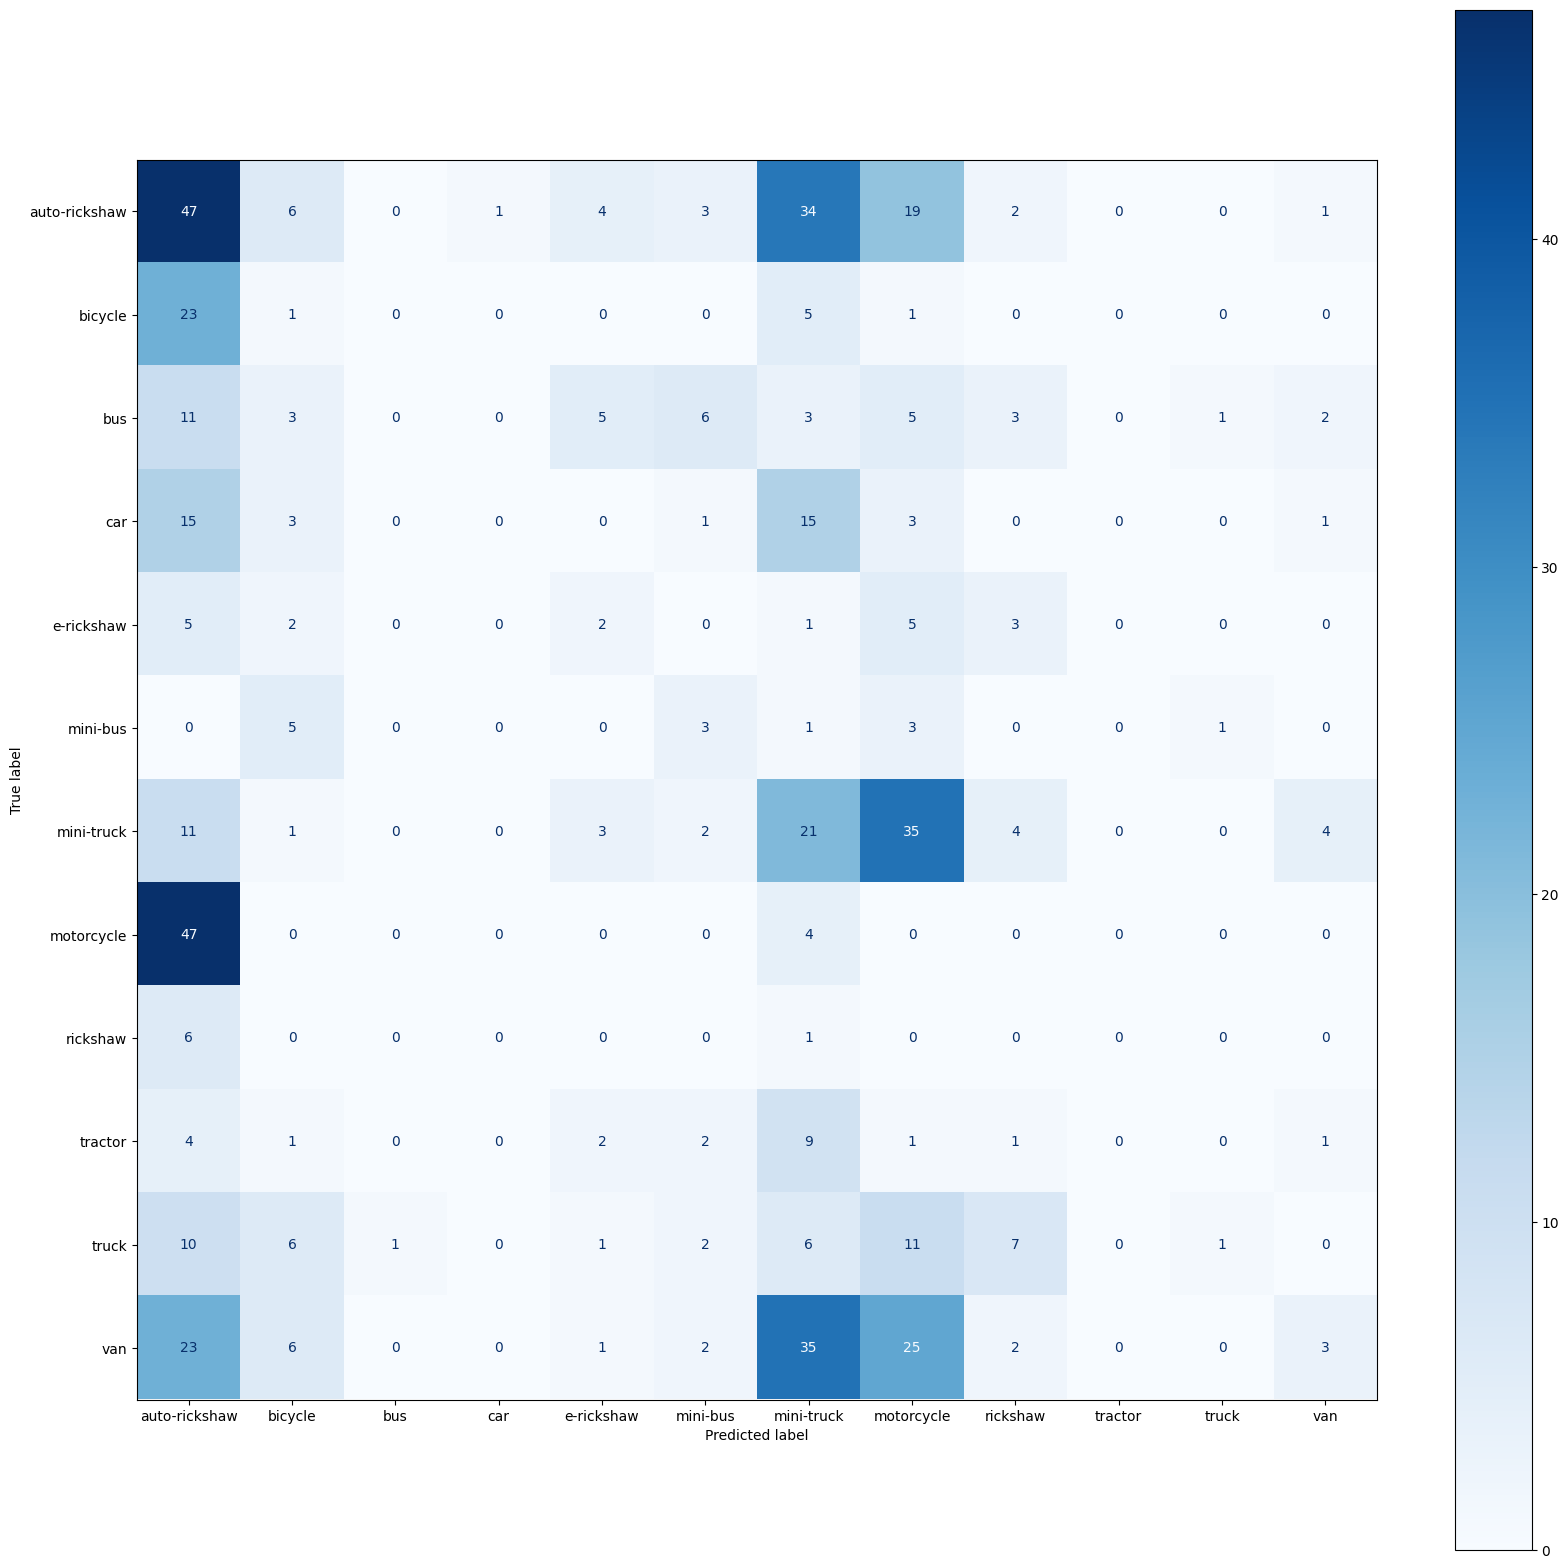

In [29]:
results = model.evaluate(valid_X, validation_labels)
for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)
print()
test_predictions = model.predict(x=valid_X)
validation_index = tf.argmax(validation_labels, axis=1)
predictions_index = tf.argmax(test_predictions, axis=1)

# print('f1_score:',f1_score(validation_labels, test_predictions))

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
## Plot Confusion matrix !! 
plt.rcParams['figure.figsize'] = [20, 20]
cm = confusion_matrix(validation_index, predictions_index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES2)

disp.plot(cmap=plt.cm.Blues)
plt.show()


In [38]:
import tf2onnx
pre_trained_model.trainable = True
for layer in pre_trained_model.layers[:18]:    #Freeze weights of eight five layers
    layer.trainable = False

#pre_trained_model.summary()
# model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=METRICS,
)
with tf.device('/GPU:0'):
    history = model.fit(train_X, training_labels, epochs=15, validation_data = (valid_X, validation_labels), batch_size=BATCH_SIZE, callbacks=[early_stopping])
    #history = model.fit(train_data_generator, validation_data=test_data_generator, batch_size=32, epochs=15, callbacks=[early_stopping], workers=32)
    # Convert the model to ONNX format
onnx_model_path = "model.onnx"

# Convert the Keras model to ONNX
spec = (tf.TensorSpec((None, 224, 224, 3), tf.float32, name="input"),)  # Adjust input shape as per your model
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature=spec)

# Save the ONNX model
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Model successfully saved to {onnx_model_path}")

Epoch 1/15
142/142 [==============================] - 38s 166ms/step - loss: 1.0804 - tp: 1278.0000 - fp: 265.0000 - tn: 30711.0000 - fn: 1538.0000 - accuracy: 0.6545 - precision: 0.8283 - recall: 0.4538 - auc: 0.9442 - prc: 0.7314 - val_loss: 0.9393 - val_tp: 300.0000 - val_fp: 61.0000 - val_tn: 6066.0000 - val_fn: 257.0000 - val_accuracy: 0.6930 - val_precision: 0.8310 - val_recall: 0.5386 - val_auc: 0.9598 - val_prc: 0.7862
Epoch 2/15
142/142 [==============================] - 22s 158ms/step - loss: 0.8989 - tp: 1259.0000 - fp: 173.0000 - tn: 24676.0000 - fn: 1000.0000 - accuracy: 0.7109 - precision: 0.8792 - recall: 0.5573 - auc: 0.9629 - prc: 0.8108 - val_loss: 0.8934 - val_tp: 327.0000 - val_fp: 69.0000 - val_tn: 6058.0000 - val_fn: 230.0000 - val_accuracy: 0.7092 - val_precision: 0.8258 - val_recall: 0.5871 - val_auc: 0.9619 - val_prc: 0.8013
Epoch 3/15
142/142 [==============================] - 22s 158ms/step - loss: 0.7898 - tp: 1418.0000 - fp: 180.0000 - tn: 24669.0000 - fn: 

2024-12-05 02:17:30.596468: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-05 02:17:30.598021: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-12-05 02:17:30.598069: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2024-12-05 02:17:30.598759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-05 02:17:30.600133: I tensorflow/compiler/xla/stream_executor/

Model successfully saved to model.onnx


In [42]:
import onnxruntime as ort
import numpy as np
import cv2

# Load ONNX model
onnx_model_path = "model.onnx"
session = ort.InferenceSession(onnx_model_path)

# Get model input details
input_name = session.get_inputs()[0].name
input_shape = session.get_inputs()[0].shape  # Typically [batch_size, height, width, channels]
print(f"Model input shape: {input_shape}")

# Preprocess the input image
def preprocess_image(image_path, input_size):
    image = cv2.imread(image_path)  # Load image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (input_size[1], input_size[2]))  # Resize to model input size
    image = image.astype(np.float32)  # Convert to float32
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Load and preprocess the image
image_path = "/home/shamsher/aditya/code/lalit_data/e-rickshaw/0_444_10-21-08_009580.jpg"  # Path to your test image
input_size = (1, 224, 224, 3)  # Update based on your model
preprocessed_image = preprocess_image(image_path, input_size)

# Perform inference
outputs = session.run(None, {input_name: preprocessed_image})

# Postprocess the output
output = outputs[0]  # Assuming the model has a single output
predicted_class = np.argmax(output, axis=1)  # Get the class index with the highest probability
print(f"Predicted class: {predicted_class}")


Model input shape: ['unk__1459', 224, 224, 3]
Predicted class: [2]


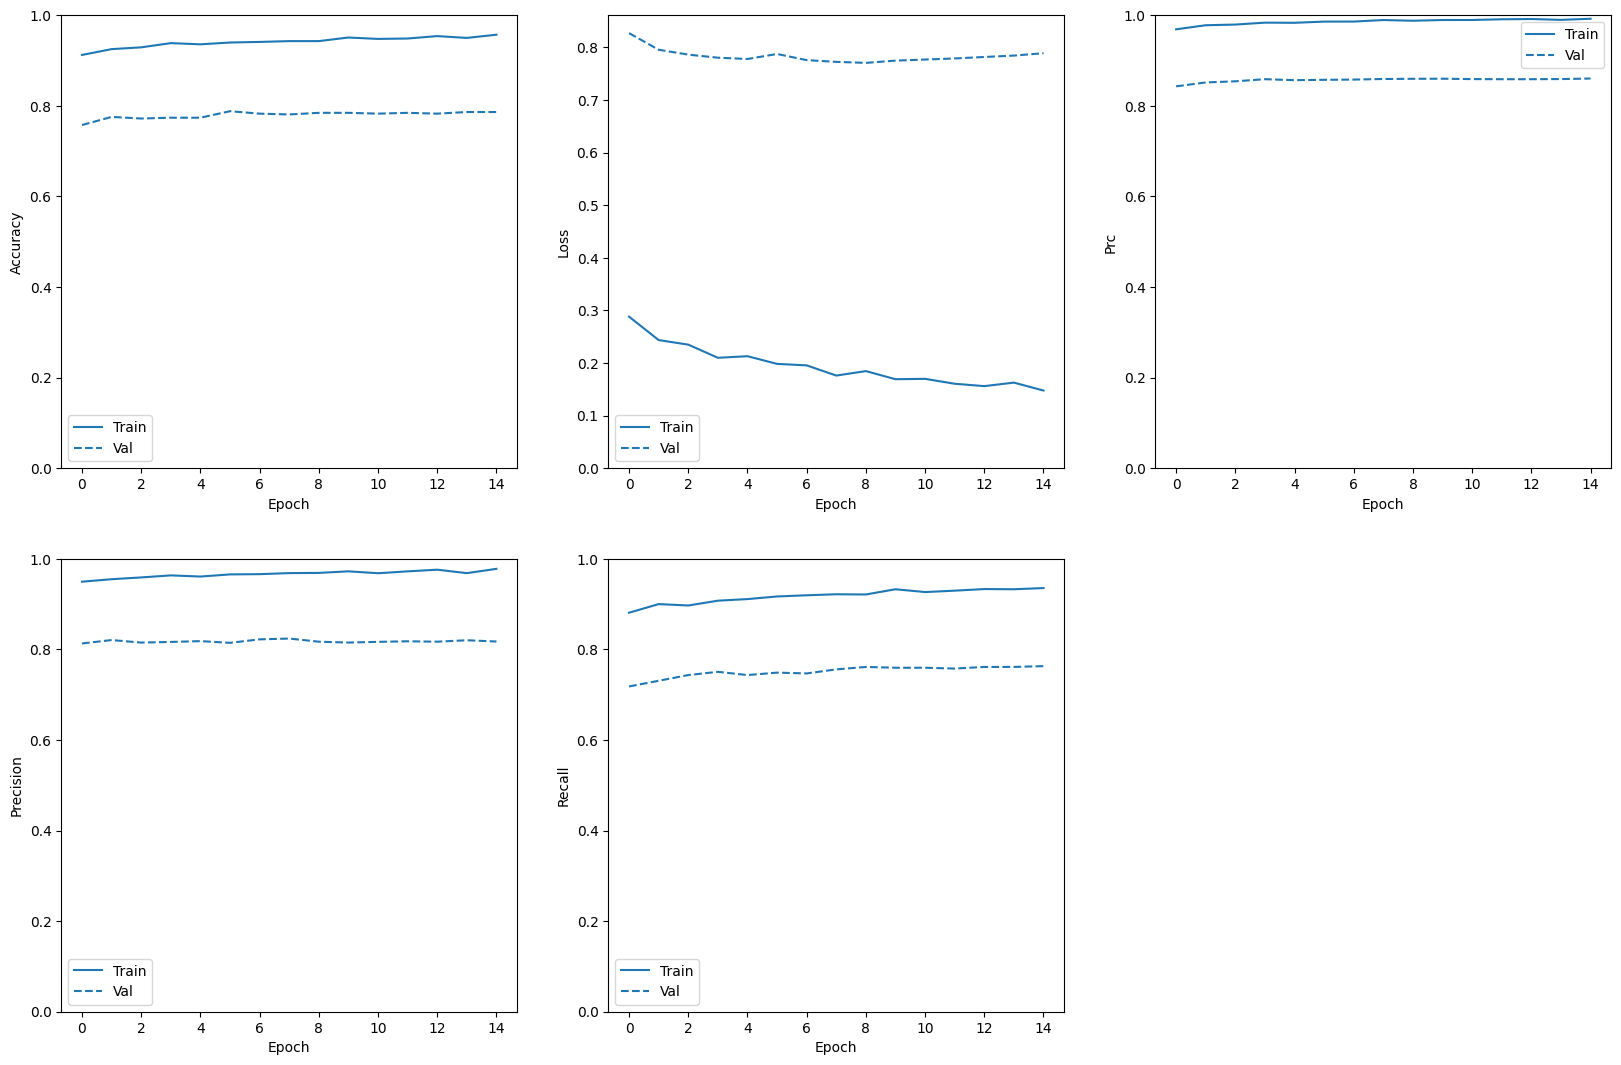

In [33]:
plot_metrics(history)

In [ ]:
# test_data_generator.reset()
# predictions = model.predict_generator(generator=test_data_generator,
#                                     steps=test_data_generator.samples//32,
#                                     max_queue_size=10,
#                                     workers=0,
#                                     use_multiprocessing=False,
#                                     verbose=0)
# predictions_index = np.argmax(predictions, axis=1)
# validation_index = test_data_generator.classes[test_data_generator.index_array]

18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 434ms/step - accuracy: 0.7979 - auc: 0.9647 - fn: 78.2632 - fp: 58.3158 - loss: 0.7742 - prc: 0.8653 - precision: 0.8199 - recall: 0.7742 - tn: 3421.1580 - tp: 238.0526
loss :  0.7889649271965027
compile_metrics :  425.0

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 474ms/step


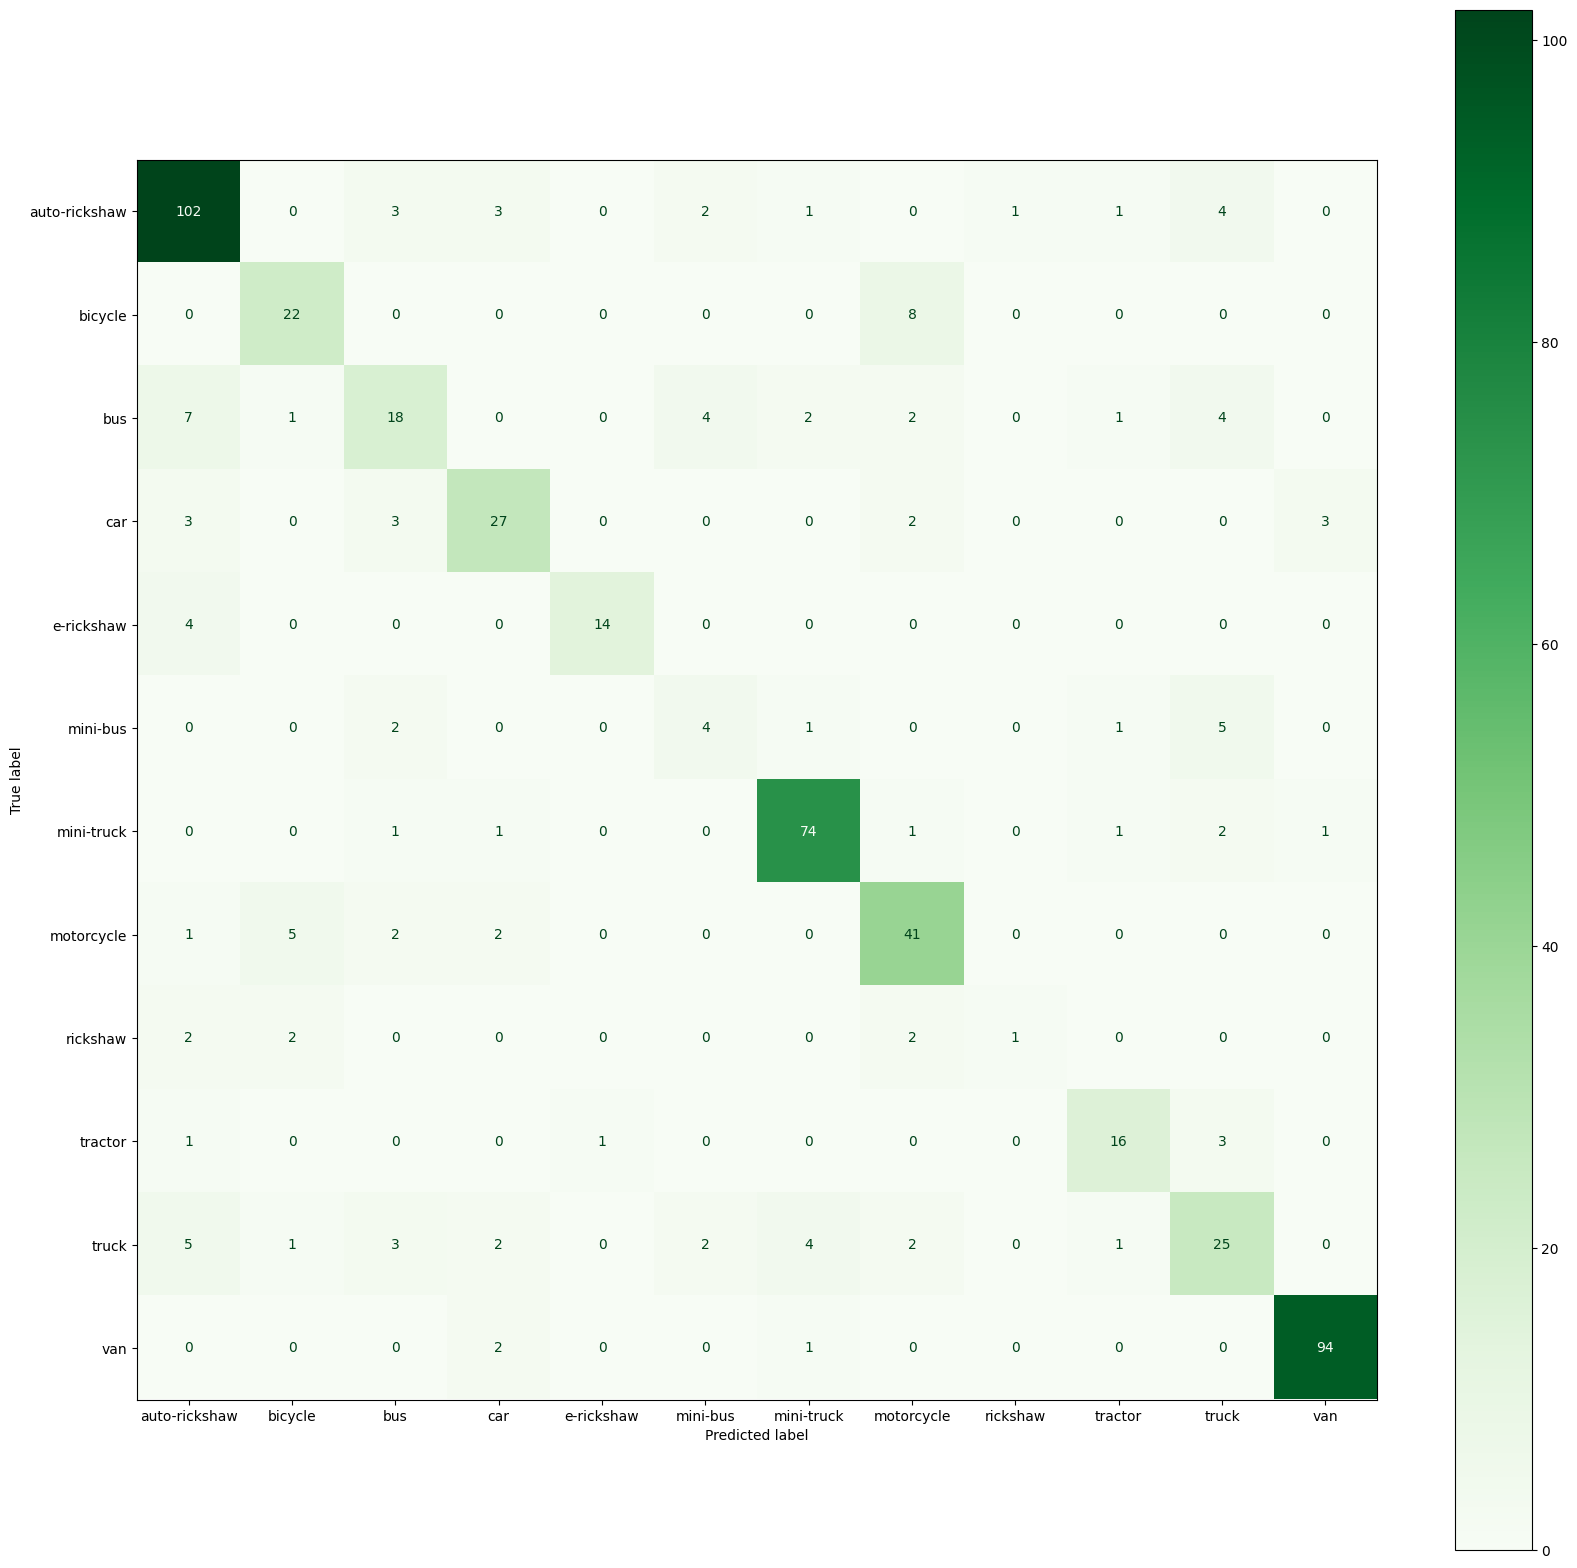

In [35]:
results = model.evaluate(valid_X, validation_labels)

for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)
print()

test_predictions = model.predict(x=valid_X)

validation_index = tf.argmax(validation_labels, axis=1)
predictions_index = tf.argmax(test_predictions, axis=1)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
## Plot Confusion matrix !! 
plt.rcParams['figure.figsize'] = [20, 20]
cm = confusion_matrix(validation_index, predictions_index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES2)

disp.plot(cmap=plt.cm.Greens)
plt.show()

In [36]:
# tf.keras.models.save_model(model, './savedModel/resnet50V2_fineTuned_C-AVC_301122.h5', save_format='h5')
# model.save('./C-AVC_model_301122/')
# print("Model Saved !!")
model.save('resner_r1_after_fine_tune.keras')

### Training Done !!!